In [94]:
import torch
import SISDR as sdr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [95]:
root = '/home/data/kbh/MCSE/CGMM_RLS_MPDR/train/'
clean_path = root + 'clean/011_011C0201.pt'
SNRm5 = root + 'SNR-5/estimated_speech/011_011C0201.pt'
SNR0 = root + 'SNR0/estimated_speech/011_011C0201.pt'
SNRp5 = root + 'SNR5/estimated_speech/011_011C0201.pt'

In [100]:
def disp(data,title,l=-80,h=20):
    data = data.detach().cpu().numpy()
    spec = np.power(data[:,:,0],2) + np.power(data[:,:,1],2)
    spec = 10*np.log(spec)
    fig, ax = plt.subplots()
    im = plt.imshow(spec, cmap=cm.jet, aspect='auto',origin='lower')
    plt.colorbar(im)
    plt.clim(l,h)
    
    plt.xlabel('Time')
    plt.ylabel('Freq')
    plt.title(title)
    plt.show()

# Time Domain SDR Loss

torch.Size([1, 513, 406, 2])
torch.Size([1, 513, 406, 2])


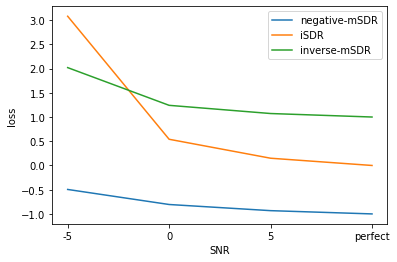

In [137]:
spec_clean = torch.load(clean_path)
spec_SNRm5 = torch.load(SNRm5)
spec_SNR0  = torch.load(SNR0)
spec_SNRp5 = torch.load(SNRp5)

# for batch dimension
spec_clean = torch.unsqueeze(spec_clean,0)
spec_SNRm5 = torch.unsqueeze(spec_SNRm5,0)
spec_SNR0 = torch.unsqueeze(spec_SNR0,0)
spec_SNRp5 = torch.unsqueeze(spec_SNRp5,0)

print(spec_clean.shape)
print(spec_SNRm5.shape)

loss = sdr.SDR('cpu')

SDRm5_1 = loss.SDRLoss(spec_SNRm5,spec_clean)
SDR0_1 = loss.SDRLoss(spec_SNR0,spec_clean)
SDRp5_1 = loss.SDRLoss(spec_SNRp5,spec_clean)
SDRf_1 = loss.SDRLoss(spec_clean,spec_clean)

SDRm5_2 = loss.mSDRLoss(spec_SNRm5,spec_clean)
SDR0_2 = loss.mSDRLoss(spec_SNR0,spec_clean)
SDRp5_2 = loss.mSDRLoss(spec_SNRp5,spec_clean)
SDRf_2 = loss.mSDRLoss(spec_clean,spec_clean)

SDRm5_7 = loss.iSDRLoss(spec_SNRm5,spec_clean)
SDR0_7 = loss.iSDRLoss(spec_SNR0,spec_clean)
SDRp5_7 = loss.iSDRLoss(spec_SNRp5,spec_clean)
SDRf_7 = loss.iSDRLoss(spec_clean,spec_clean)



#plt.plot([-5,0,5],[SDRm5_1,SDR0_1,SDRp5_1],label='SDR')
plt.plot([-5,0,5,'perfect'],[SDRm5_2,SDR0_2,SDRp5_2,SDRf_2],label='negative-mSDR')
plt.plot([-5,0,5,'perfect'],[SDRm5_7,SDR0_7,SDRp5_7,SDRf_7],label='iSDR')
plt.plot([-5,0,5,'perfect'],[1/-SDRm5_2,1/-SDR0_2,1/-SDRp5_2,1/-SDRf_2],label='inverse-mSDR')

plt.xlabel('SNR')
plt.ylabel('loss')
plt.legend()
plt.show()


# STFT domain loss

In [82]:
spec_clean = torch.load(clean_path)
spec_SNRm5 = torch.load(SNRm5)
spec_SNR0  = torch.load(SNR0)
spec_SNRp5 = torch.load(SNRp5)

# for batch dimension
spec_clean = torch.unsqueeze(spec_clean,0)
spec_SNRm5 = torch.unsqueeze(spec_SNRm5,0)
spec_SNR0 = torch.unsqueeze(spec_SNR0,0)
spec_SNRp5 = torch.unsqueeze(spec_SNRp5,0)

print(spec_clean.shape)
print(spec_SNRm5.shape)

torch.Size([1, 513, 406, 2])
torch.Size([1, 513, 406, 2])


In [83]:
SNR = 5
SNR_weight =np.sqrt(np.power(10,SNR/10)) 
print(SNR_weight)

1.7782794100389228


## val

torch.Size([1, 513, 406, 2])
torch.Size([1, 513, 406, 2])


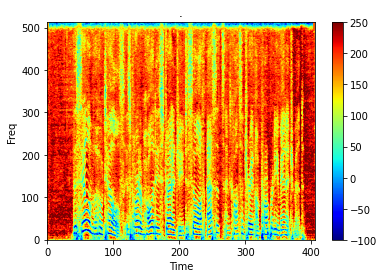

tensor(43873.3984)

In [135]:
xx = spec_SNRm5*spec_SNRm5
xy = spec_clean * spec_SNRm5
xy = xy**2
xy = xy + 2e-7
val = xx/xy
print(xx.shape)
print(xy.shape)
disp(torch.squeeze(val),'.',l=-100,h=250)
torch.mean(val)

## Plot

torch.Size([1, 513, 406, 2])


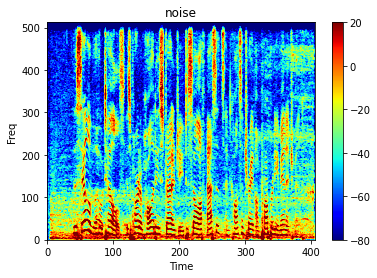

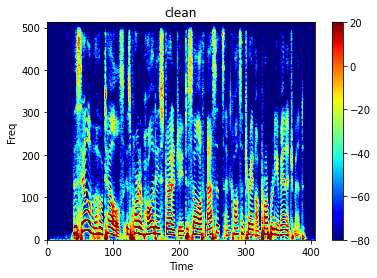

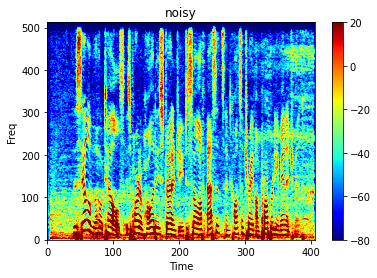

In [86]:
spec_clean = spec_clean
diff = torch.abs(spec_SNRp5-spec_clean)
print(diff.shape)
disp(torch.squeeze(diff),'noise')
disp(torch.squeeze(spec_clean),'clean')
disp(torch.squeeze(spec_SNRp5),'noisy')